In [1]:
import numpy as np
import pandas as pd
import os
import glob
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_colwidth", 200)
pd.set_option("display.max_row", 500)

In [6]:
def plot_scores(score_df, metric, score_type, title="", save_folder="", col_order=None, hue_order=None):

    g = sns.catplot(x="Domain", y="Score", hue="alpha", col="Multiplication Factor", col_order=col_order,
                    data=score_df.rename(columns={"Data mul factor":"Multiplication Factor"}), ci="sd", 
                    kind="bar", hue_order=hue_order)


    for i, ax in enumerate(g.fig.axes):
        ax.set_xticklabels(ax.get_xticklabels(), rotation=65)
        ax.axhline(0, color="black")
        ax.set_ylabel("$R^2$", fontsize=15)
        ax.set_xlabel("")

    g.fig.suptitle(title.replace("R2", "$R^2$"), y=1.08, fontsize=30)
    
    if metric == "R2" and score_type == "Out-of-sample":
        g.set(ylim=(-0.6, 0.2))
#         plt.savefig(save_folder + title, bbox_inches="tight")
#         pass
        
    if metric == "R2" and (score_type == "In-sample" or score_type == "In-sample (original)"):
        g.set(ylim=(-0.05, 1.0))
        h=True
        for i, ax in enumerate(g.fig.axes):
#             if h==True:
#                 ax.axhline(0.1, color="black")
#                 ax.axhline(0.2, color="black")
#                 h=False
#             else:
            ax.axhline(0.2, color="black", linewidth=1)
        
    if metric == "MAE":
        g.set(ylim=(0.0, 1.6))
        for i, ax in enumerate(g.fig.axes):
            ax.axhline(0.2, color="black", linewidth=1)
        
#     plt.show()
    plt.savefig(save_folder + title + "_" + metric + "_" + score_type, bbox_inches="tight", dpi=600)


def plot_all_scores(score_df, title_prefix="", save_folder="", col_order=None, hue_order=None):   
    
#     for metric in score_df["Metric"].unique():
    metric = "R2"

    for score_type in np.sort(score_df["Score type"].unique()):

        for model in score_df["Model"].unique():

            filtered_data = score_df[(score_df["Metric"] == metric) & (score_df["Score type"] == score_type) 
                                     & (score_df["Model"] == model)]

#             if score_type == "In-sample (original)":
#                 filtered_data = filtered_data[filtered_data["alpha"] != "No mixup"]
#                 col_order_new=["5x", "10x"]
#             else:
#                 col_order_new = col_order
            col_order_new = col_order

#             title = title_prefix + model + " - " + metric + " - " + score_type
            title = title_prefix

            plot_scores(filtered_data, metric, score_type, title, save_folder, col_order=col_order_new, hue_order=hue_order)

In [3]:
# utility to load results
def load_dfs(direc, regex):
    path = "/Users/hasnainmamdani/Academics/McGill/thesis/stroke-impairment-analysis/regression/mixup/results_remote/" + direc
    filenames = glob.glob(os.path.join(path, regex))
    filenames.sort()

    res = []
    bps = []
    for fn in filenames:
        if "best-params-" in fn:
            bp = pd.read_hdf(fn, key='p', mode='r')
            print(bp["% Data (train)"].unique(), bp["Data mul factor"].unique(), bp["alpha"].unique())
            bps.append(bp)
        else:
            res.append(pd.read_hdf(fn, key='p', mode='r'))

    print(len(res), len(bps))
    return res, bps

In [4]:
results_dir = "/Users/hasnainmamdani/Academics/McGill/thesis/stroke-impairment-analysis/regression/results/unfiltered_all_1401n/"

## 1- Ridge

In [5]:
ridge = pd.read_hdf(results_dir + 'singleoutput/atlas-llm-with-wm-mixup-before-log/results_atlas_llm_singleoutput_mixup_before_log_ridge_all.h5', key='p', mode='r')
bpridge = pd.read_hdf(results_dir + 'singleoutput/atlas-llm-with-wm-mixup-before-log/best_params_atlas_llm_singleoutput_mixup_before_log_ridge_all.h5', key='p', mode='r')

# ridge.to_hdf('results/singleoutput/atlas-llm-with-wm-mixup-before-log/results_atlas_llm_singleoutput_mixup_before_log_ridge_all.h5', key='p', mode='w')
# bpridge.to_hdf('results/singleoutput/atlas-llm-with-wm-mixup-before-log/best_params_atlas_llm_singleoutput_mixup_before_log_ridge_all.h5', key='p', mode='w')

In [16]:
ridlist, bpridlist = load_dfs("", "*singleoutput*ridge*")

[100.] ['No mixup' '5x' '10x'] ['No mixup' 0.01 0.1]
[100.] ['5x' '10x'] [0.3 1. ]
2 2


In [45]:
# ridge

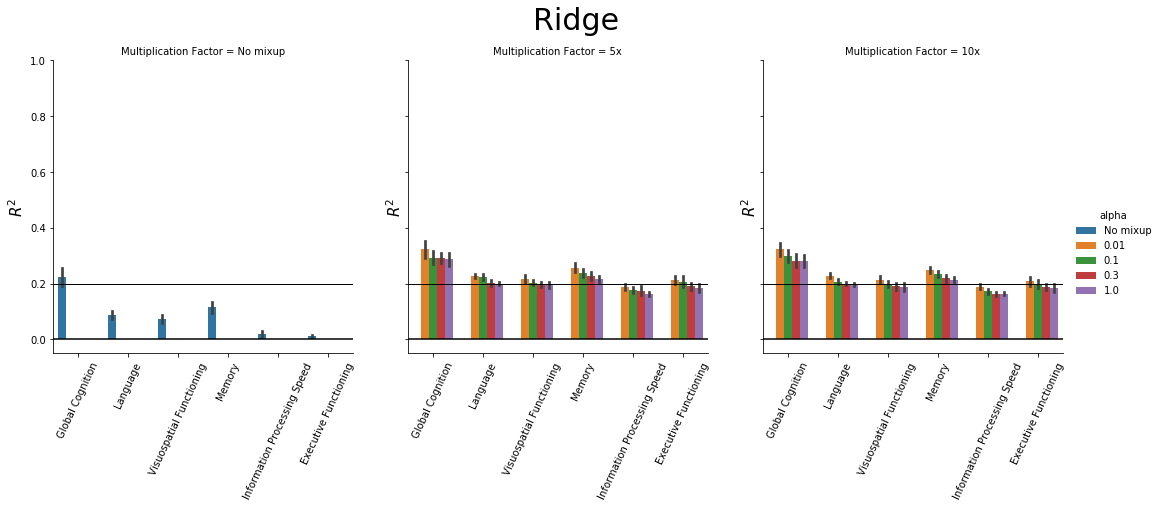

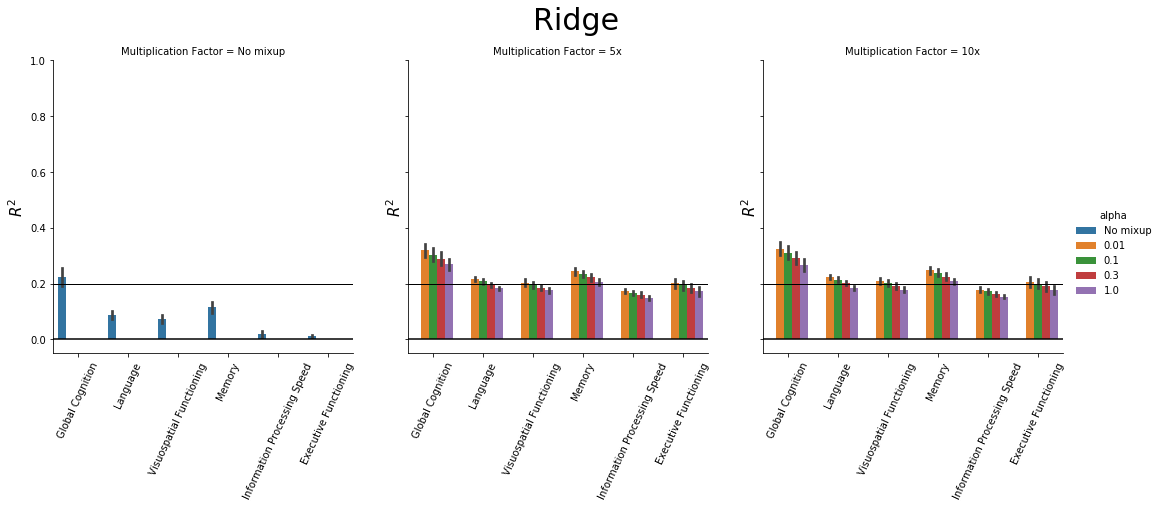

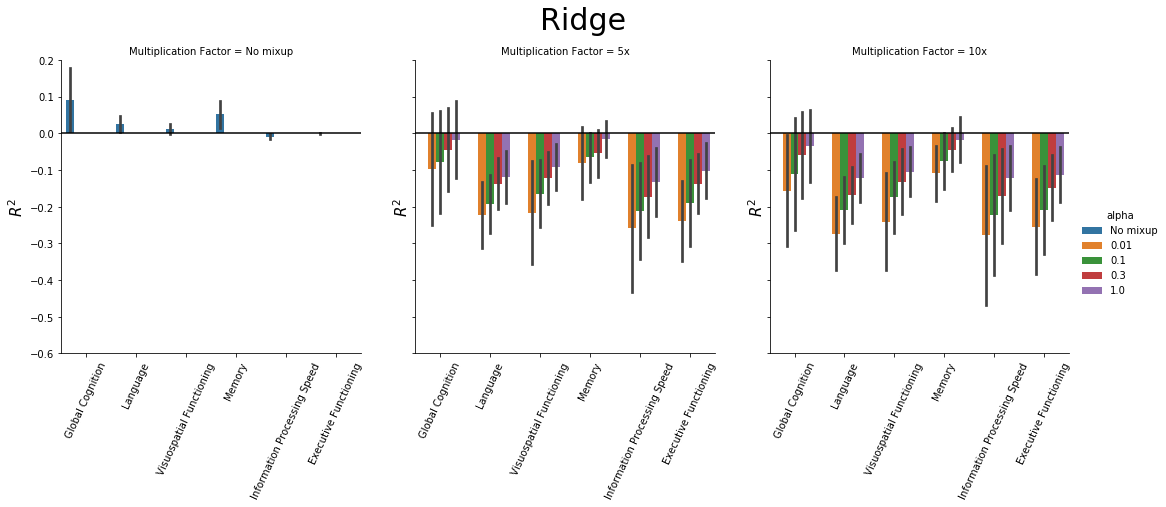

In [7]:
plot_all_scores(ridge, col_order=["No mixup", "5x", "10x"], hue_order=["No mixup", 0.01, 0.1, 0.3, 1.0], 
                title_prefix="Ridge", save_folder="pngs/")

## 2- SVR - RBF

In [10]:
# svr = pd.read_hdf('results/singleoutput/atlas-llm-with-wm-mixup-before-log/results_atlas_llm_singleoutput_mixup_before_log_svr_all.h5', key='p', mode='r')
# bpsvr = pd.read_hdf('results/singleoutput/atlas-with-wm-llm-mixup-before-log/best_params_atlas_llm_singleoutput_mixup_before_log_svr_all.h5', key='p', mode='r')

svr.to_hdf('results/singleoutput/atlas-llm-with-wm-mixup-before-log/results_atlas_llm_singleoutput_mixup_before_log_svr_all.h5', key='p', mode='w')
bpsvr.to_hdf('results/singleoutput/atlas-llm-with-wm-mixup-before-log/best_params_atlas_llm_singleoutput_mixup_before_log_svr_all.h5', key='p', mode='w')

/usr/local/lib/python3.7/site-packages/pandas/core/generic.py:2368: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['Data mul factor', 'alpha', 'Model', 'Domain', 'Metric', 'Score type']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)
/usr/local/lib/python3.7/site-packages/pandas/core/generic.py:2368: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['Data mul factor', 'alpha', 'Model', 'Domain', 'Best params']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


In [5]:
svrlist, bpsvrlist = load_dfs("","*singleoutput*svr*")

[100.] ['No mixup' '5x'] ['No mixup' 0.01 0.1]
[100.] ['5x'] [0.3 1. ]
2 2


In [6]:
svr = pd.concat(svrlist, ignore_index=True)
bpsvr = pd.concat(bpsvrlist, ignore_index=True)

In [8]:
# bpsvr

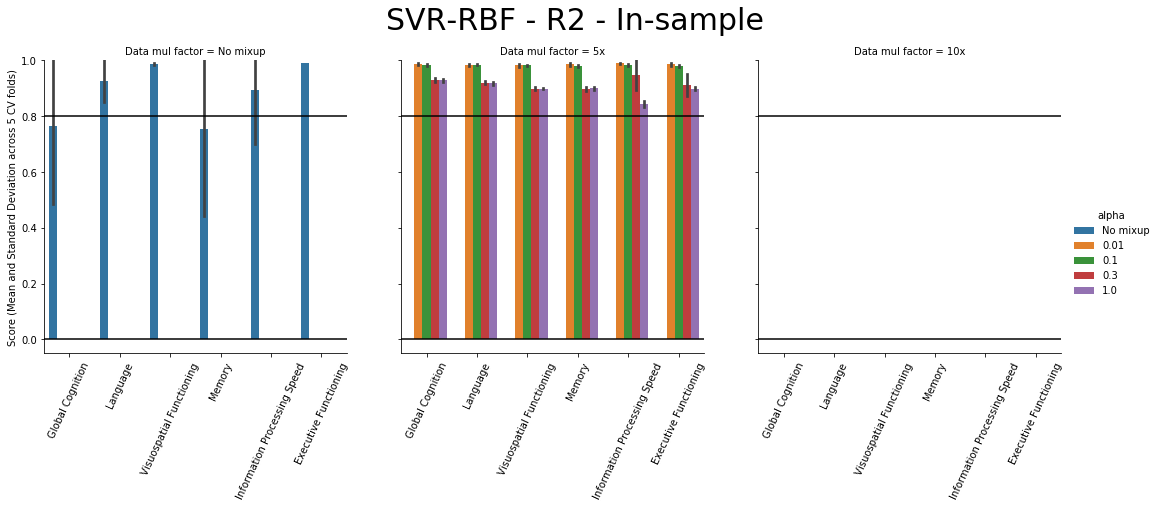

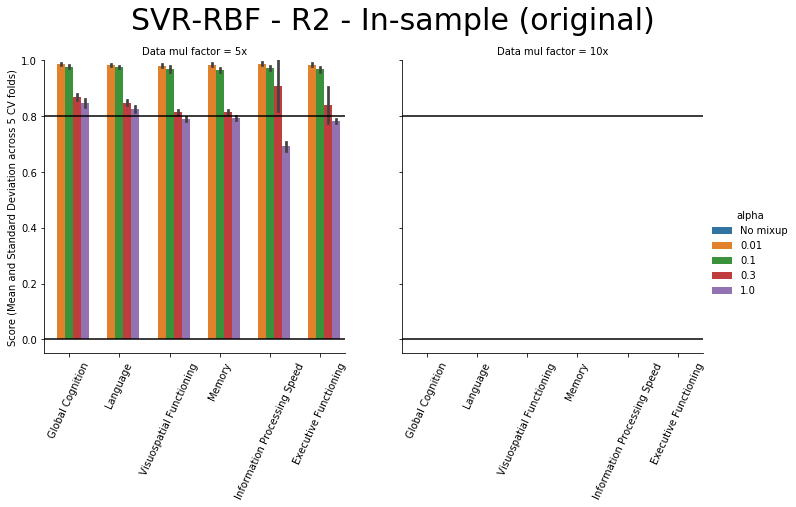

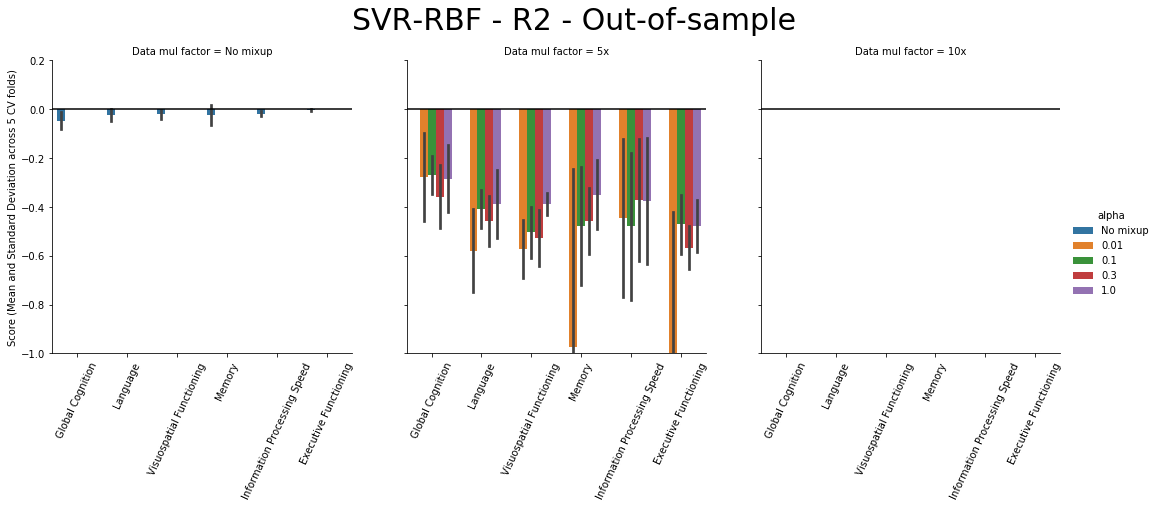

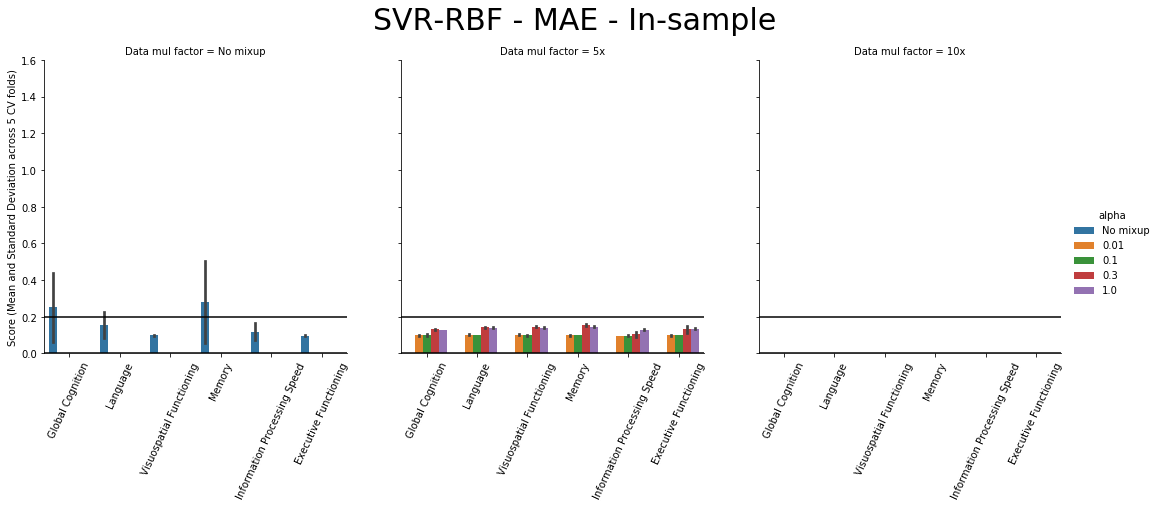

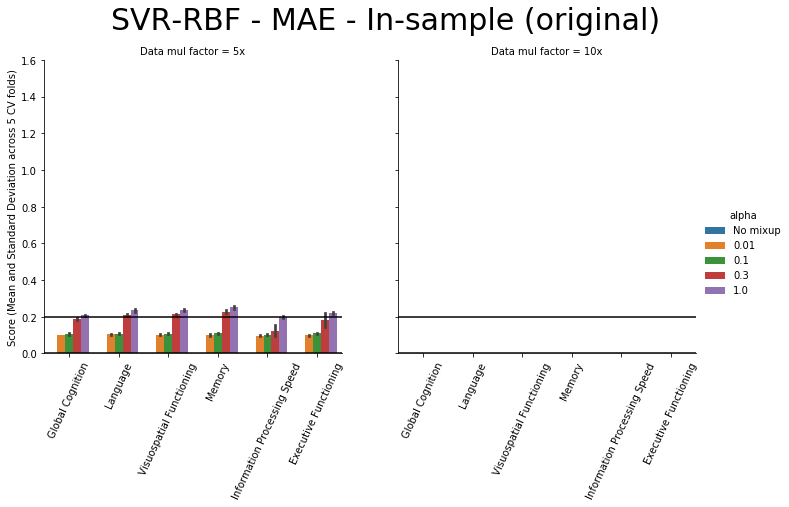

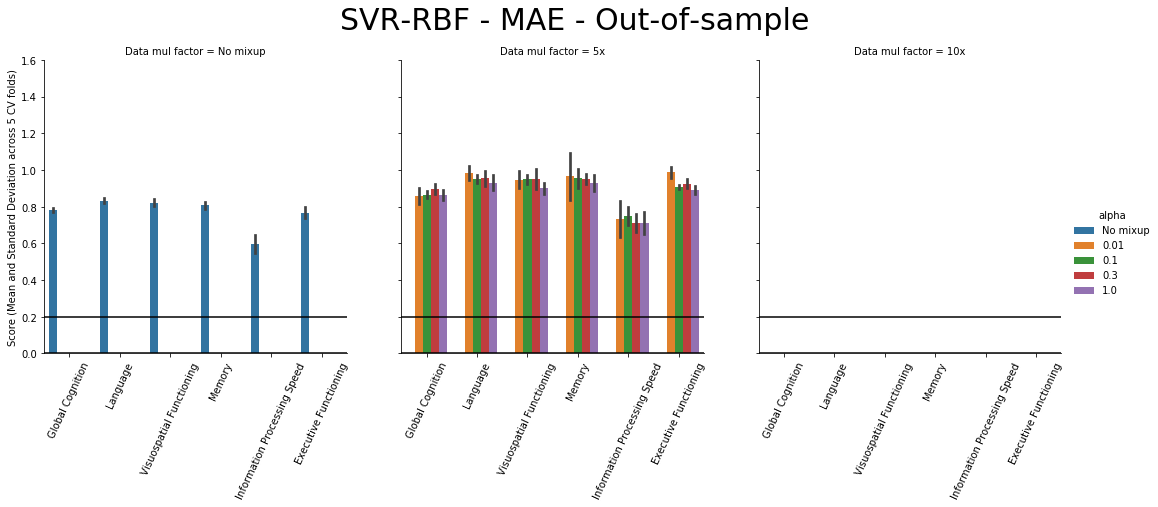

In [58]:
plot_all_scores(svr, col_order=["No mixup", "5x", "10x"], hue_order=["No mixup", 0.01, 0.1, 0.3, 1.0])

## 3- Random Forest

In [8]:
rf = pd.read_hdf(results_dir + 'singleoutput/atlas-llm-with-wm-mixup-before-log/results_atlas_llm_singleoutput_mixup_before_log_rf_all.h5', key='p', mode='r')
bprf = pd.read_hdf(results_dir + 'singleoutput/atlas-llm-with-wm-mixup-before-log/best_params_atlas_llm_singleoutput_mixup_before_log_rf_all.h5', key='p', mode='r')

# rf.to_hdf('results/singleoutput/atlas-llm-with-wm-mixup-before-log/results_atlas_llm_singleoutput_mixup_before_log_rf_all.h5', key='p', mode='w')
# bprf.to_hdf('results/singleoutput/atlas-llm-with-wm-mixup-before-log/best_params_atlas_llm_singleoutput_mixup_before_log_rf_all.h5', key='p', mode='w')

In [20]:
rflist, bprflist = load_dfs("","*singleoutput*rf*")

[100.] ['No mixup' '5x' '10x'] ['No mixup' 0.01]
[100.] ['5x' '10x'] [0.1]
[100.] ['5x' '10x'] [0.3]
[100.] ['5x' '10x'] [1.]
4 4


In [38]:
# bprf

In [21]:
rf = pd.concat(rflist, ignore_index=True)
bprf = pd.concat(bprflist, ignore_index=True)

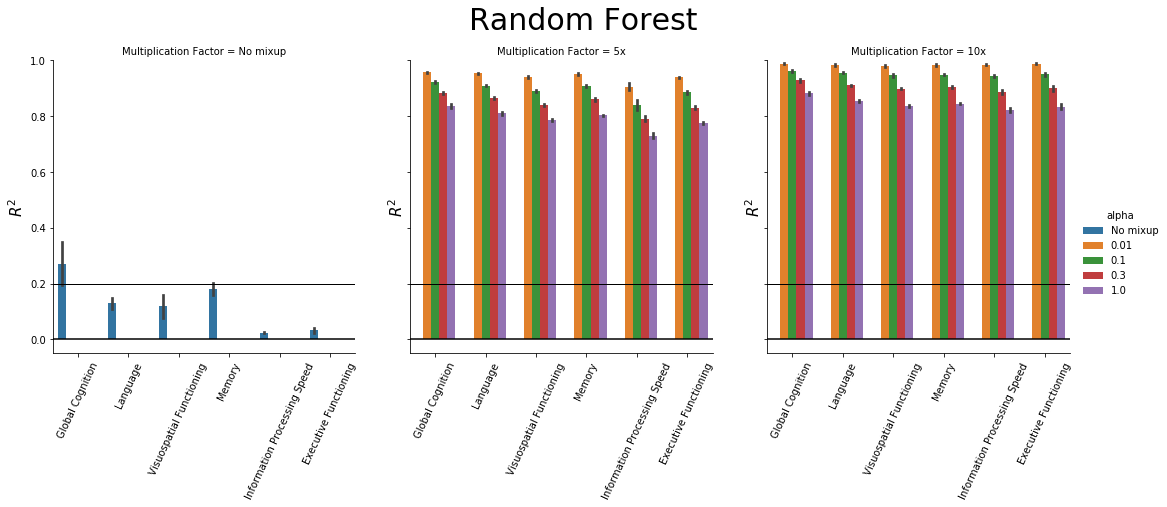

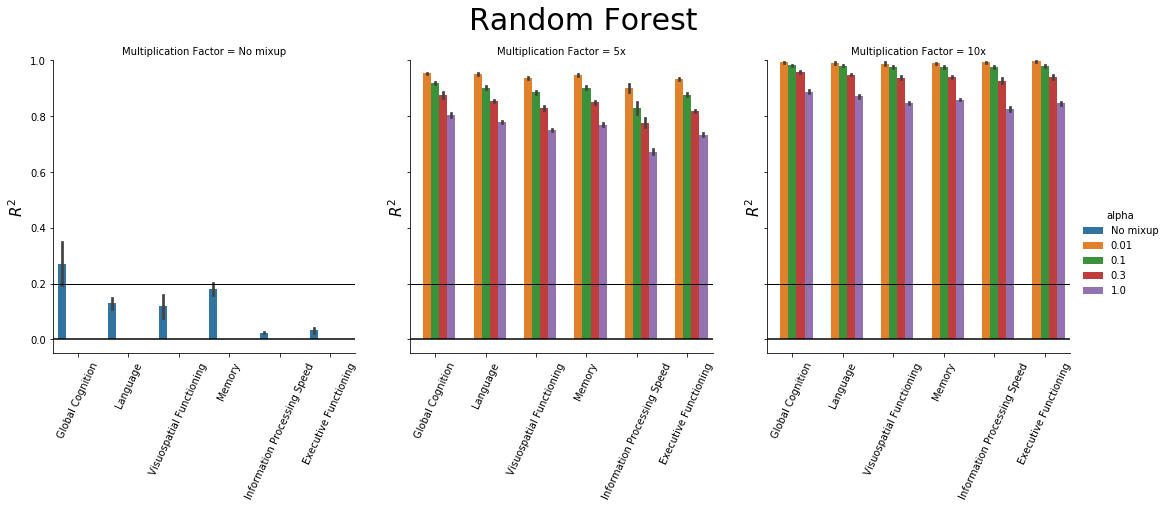

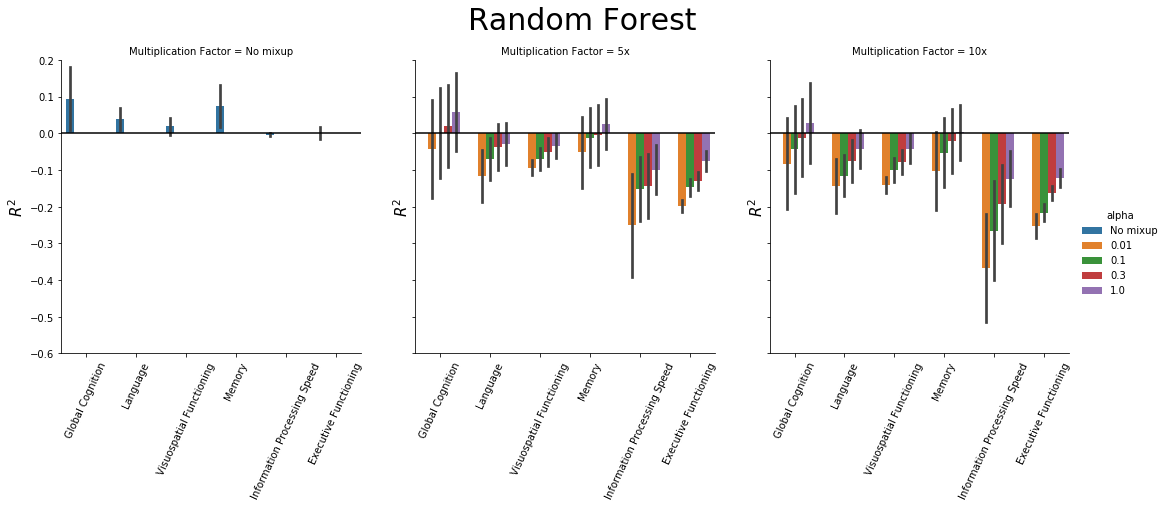

In [9]:
plot_all_scores(rf, col_order=["No mixup", "5x", "10x"], hue_order=["No mixup", 0.01, 0.1, 0.3, 1.0], 
                title_prefix="Random Forest", save_folder="pngs/")